# METRIC ALT KNOB FCU 3 N

Number of rows: 50
Number of columns: 1400


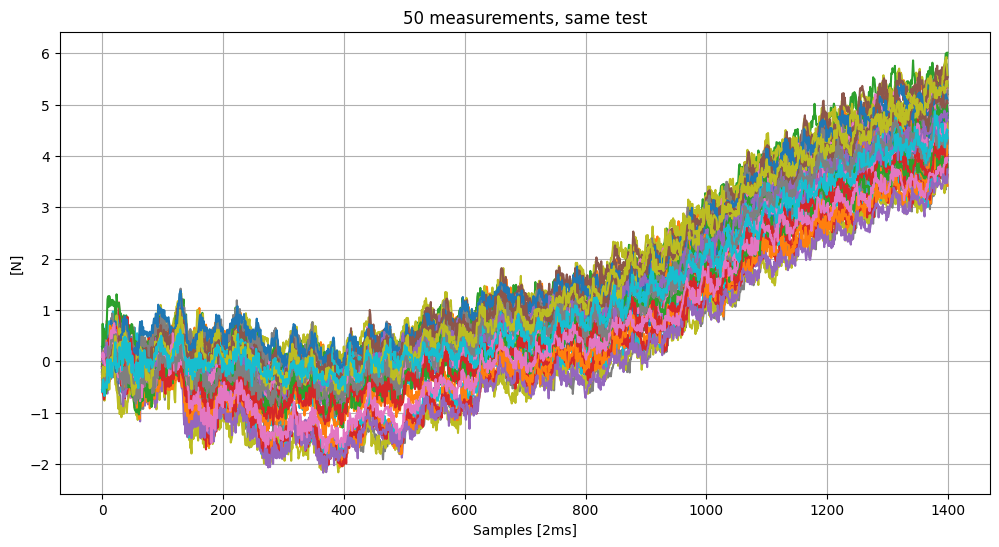

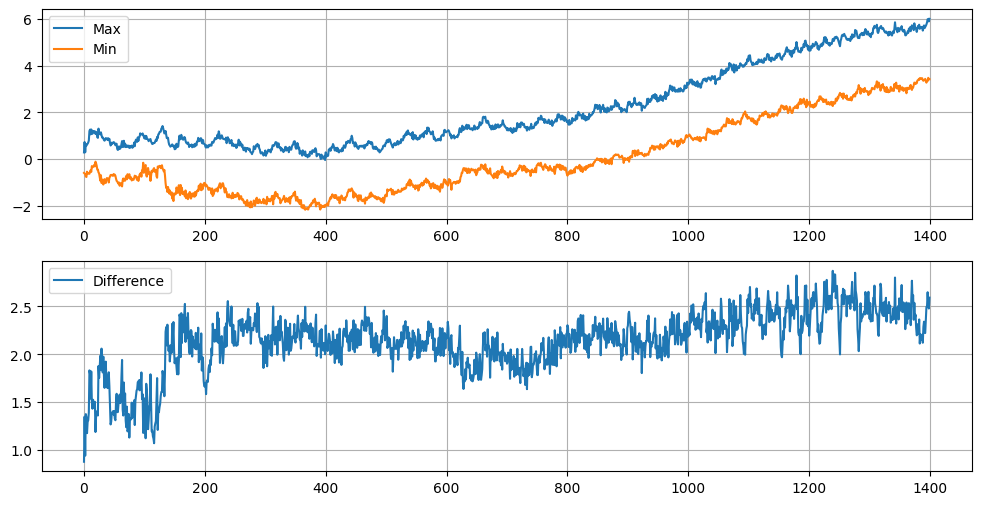

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the folder containing the CSV files
folder_path = "//home/user/thesis_ws/src/TestData_samples/var_KNOB_METRICALT_3"

# Initialize lists to store extracted features
Force_X_values = []
pose_z_values = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Extract relevant columns
        Force_X_values.append(df['Force_X'].values)
        pose_z_values.append(df['Pose_Z'].values)

# Plotting
plt.figure(figsize=(12, 6))
for Force_X in Force_X_values:
    plt.plot(Force_X, label='Force_X')

# 5N on button L of MCDU SIMA

plt.title('50 measurements, same test')
plt.xlabel('Samples [2ms]')
plt.ylabel('[N]')
#plt.legend()
plt.grid(True)
#plt.show()

rows = len(Force_X_values)
cols = len(Force_X_values[0])

print("Number of rows:", rows)
print("Number of columns:", cols)

maxv, minv = [], []
i=0
for i in range(cols):
    max_val, min_val = float('-inf'), float('inf')
    for j in range(rows):
        val = Force_X_values[j][i]
        if val > max_val:
            max_val = val
        if val < min_val:
            min_val = val
    maxv.append(max_val)
    minv.append(min_val)

diff = []
for i, (a, b) in enumerate(zip(minv, maxv)):
    diff.append(b - a)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(maxv, label='Max')
plt.plot(minv, label='Min')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
plt.plot(diff, label='Difference')
plt.grid(True)
plt.legend()

plt.show()

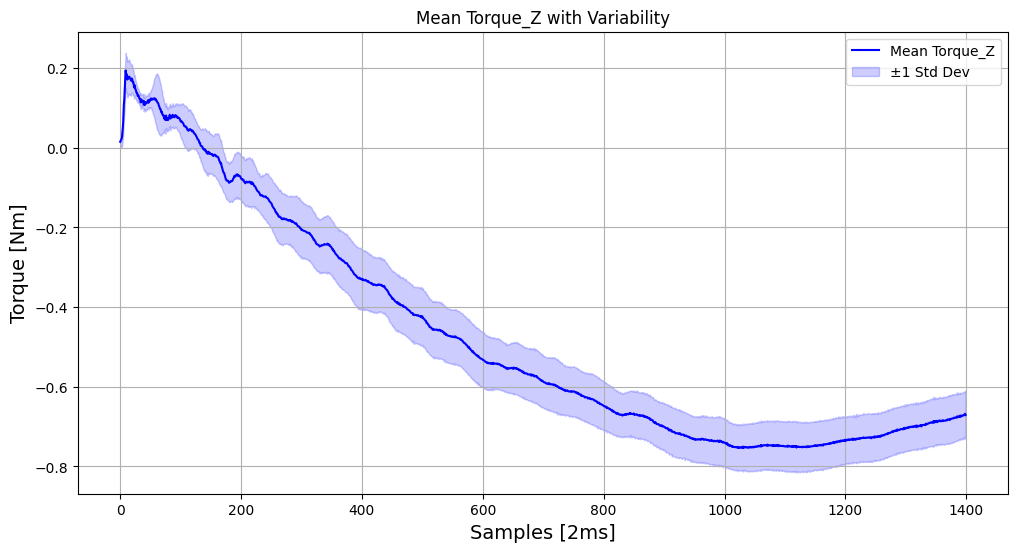

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the folder containing the CSV files
folder_path = "//home/rluser/thesis_ws/src/TestData_samples/var_KNOB_METRICALT_3"

# Initialize lists to store extracted features
Force_X_values = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Extract relevant columns
        Force_X_values.append(df['Torque_Z'].values)

# Convert list to NumPy array for easier computation
Force_X_array = np.array(Force_X_values)

# Compute mean and standard deviation across all measurements
mean_Force_X = np.mean(Force_X_array, axis=0)
std_Force_X = np.std(Force_X_array, axis=0)

# Compute min and max for shading the range
min_Force_X = np.min(Force_X_array, axis=0)
max_Force_X = np.max(Force_X_array, axis=0)

# Plotting the mean Force_X with shaded area for variability
plt.figure(figsize=(12, 6))

# Plot mean Force_X
plt.plot(mean_Force_X, label='Mean Torque_Z', color='blue')

# Shaded area between mean ± standard deviation
plt.fill_between(range(len(mean_Force_X)), 
                 mean_Force_X - std_Force_X, 
                 mean_Force_X + std_Force_X, 
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Alternatively, you can use min and max for shading the entire range
# Uncomment the following lines if you prefer this
# plt.fill_between(range(len(mean_Force_X)), 
#                  min_Force_X, 
#                  max_Force_X, 
#                  color='green', alpha=0.2, label='Range (Min-Max)')

# 5N on button L of MCDU SIMA
plt.title('Mean Torque_Z with Variability')
plt.xlabel('Samples [2ms]', fontsize=14)
plt.ylabel('Torque [Nm]', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


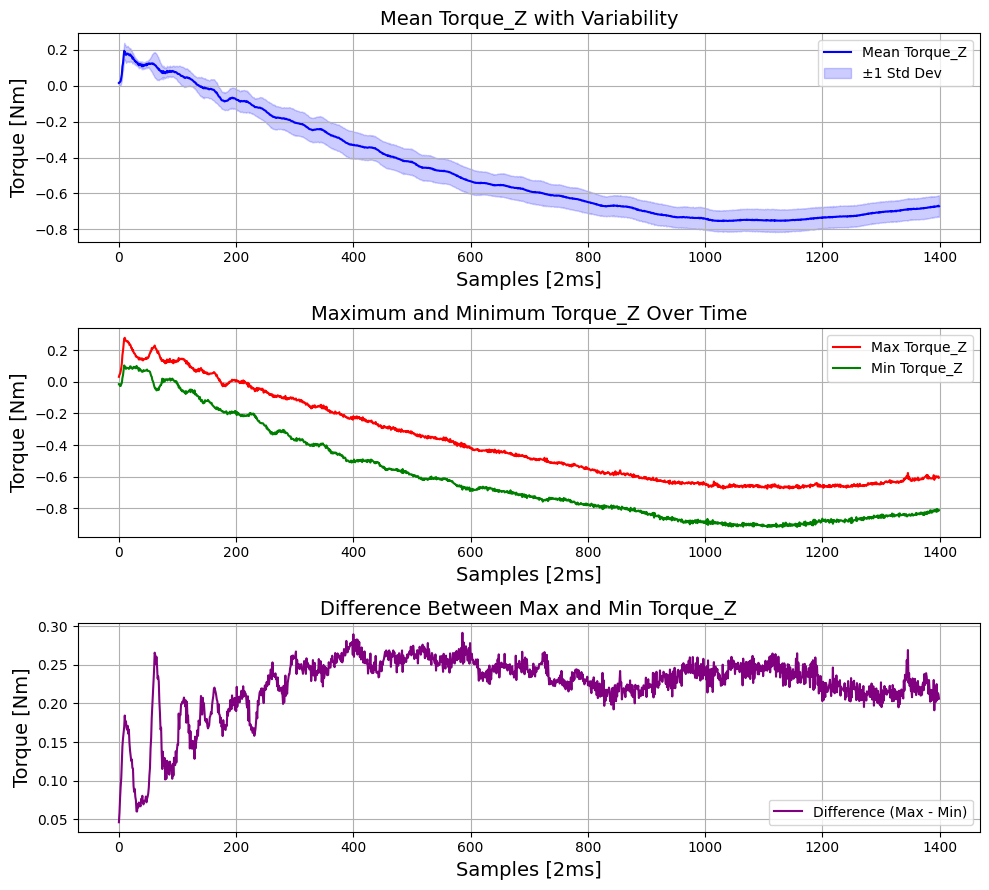

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the folder containing the CSV files
folder_path = "/home/rluser/thesis_ws/src/TestData_samples/var_KNOB_METRICALT_3"

# Initialize a list to store extracted Torque_Z values
Torque_Z_values = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Extract the Torque_Z column
        Torque_Z_values.append(df['Torque_Z'].values)

# Convert the list to a NumPy array for efficient computation
Torque_Z_array = np.array(Torque_Z_values)

# Calculate statistics across all measurements
mean_Torque_Z = np.mean(Torque_Z_array, axis=0)
std_Torque_Z = np.std(Torque_Z_array, axis=0)
min_Torque_Z = np.min(Torque_Z_array, axis=0)
max_Torque_Z = np.max(Torque_Z_array, axis=0)
diff_Torque_Z = max_Torque_Z - min_Torque_Z

# Plotting
plt.figure(figsize=(10, 9))

# Subplot 1: Mean Torque_Z with variability
plt.subplot(3, 1, 1)
plt.plot(mean_Torque_Z, label='Mean Torque_Z', color='blue')
plt.fill_between(range(len(mean_Torque_Z)),
                 mean_Torque_Z - std_Torque_Z,
                 mean_Torque_Z + std_Torque_Z,
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.title('Mean Torque_Z with Variability', fontsize=14)
plt.xlabel('Samples [2ms]', fontsize=14)
plt.ylabel('Torque [Nm]', fontsize=14)
plt.legend()
plt.grid(True)

# Subplot 2: Max and Min Torque_Z
plt.subplot(3, 1, 2)
plt.plot(max_Torque_Z, label='Max Torque_Z', color='red')
plt.plot(min_Torque_Z, label='Min Torque_Z', color='green')
plt.title('Maximum and Minimum Torque_Z Over Time', fontsize=14)
plt.xlabel('Samples [2ms]', fontsize=14)
plt.ylabel('Torque [Nm]', fontsize=14)
plt.legend()
plt.grid(True)

# Subplot 3: Difference between Max and Min
plt.subplot(3, 1, 3)
plt.plot(diff_Torque_Z, label='Difference (Max - Min)', color='purple')
plt.title('Difference Between Max and Min Torque_Z', fontsize=14)
plt.xlabel('Samples [2ms]', fontsize=14)
plt.ylabel('Torque [Nm]', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


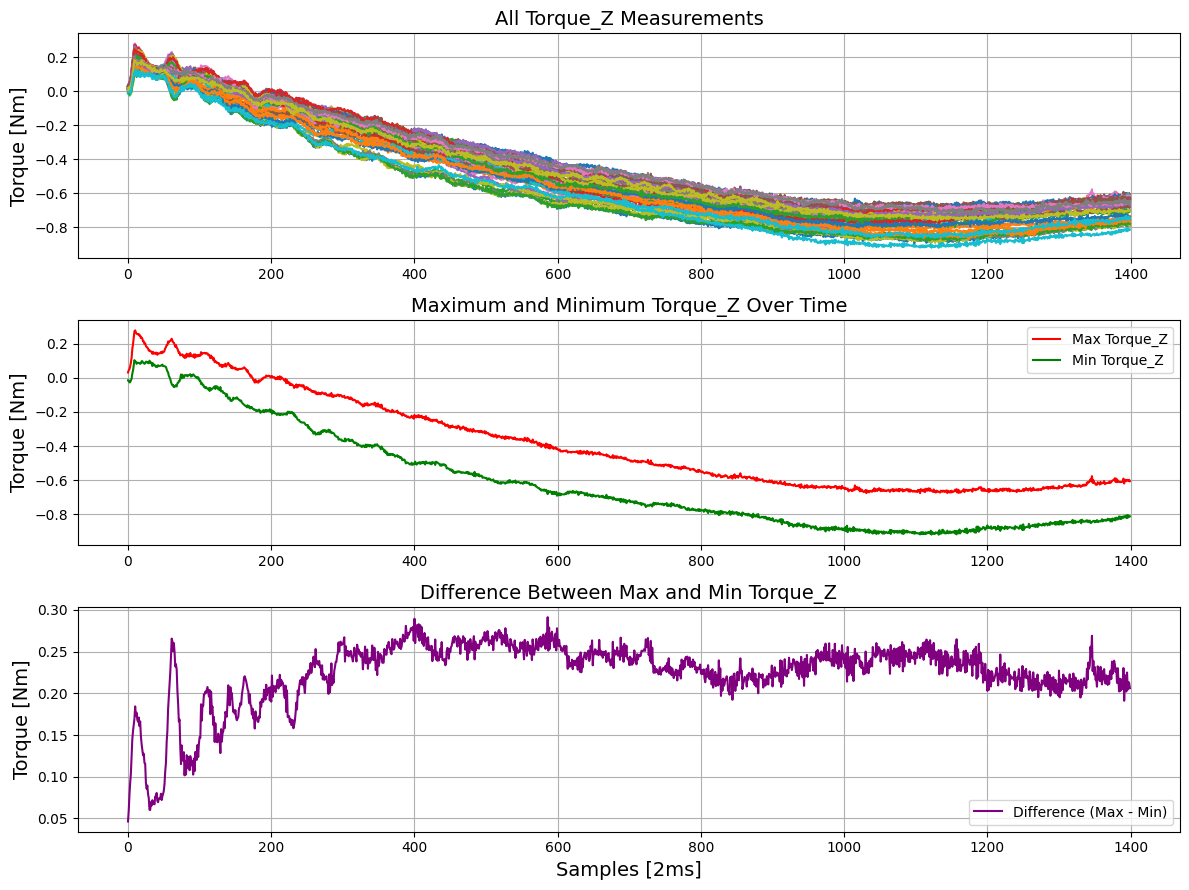

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the folder containing the CSV files
folder_path = "/home/rluser/thesis_ws/src/TestData_samples/var_KNOB_METRICALT_3"

# Initialize a list to store extracted Torque_Z values
Torque_Z_values = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Extract the Torque_Z column
        Torque_Z_values.append(df['Torque_Z'].values)

# Convert the list to a NumPy array for efficient computation
Torque_Z_array = np.array(Torque_Z_values)

# Calculate statistics across all measurements
min_Torque_Z = np.min(Torque_Z_array, axis=0)
max_Torque_Z = np.max(Torque_Z_array, axis=0)
diff_Torque_Z = max_Torque_Z - min_Torque_Z

# Plotting
plt.figure(figsize=(12, 9))

# Subplot 1: All 50 Torque_Z measurements
plt.subplot(3, 1, 1)
for i, torque in enumerate(Torque_Z_array):
    plt.plot(torque, label=f'Measurement {i+1}')
# Optional: Uncomment the next line to display the legend (may be cluttered with 50 entries)
# plt.legend()
plt.title('All Torque_Z Measurements', fontsize=14)
plt.ylabel('Torque [Nm]', fontsize=14)
plt.grid(True)

# Subplot 2: Max and Min Torque_Z
plt.subplot(3, 1, 2)
plt.plot(max_Torque_Z, label='Max Torque_Z', color='red')
plt.plot(min_Torque_Z, label='Min Torque_Z', color='green')
plt.title('Maximum and Minimum Torque_Z Over Time', fontsize=14)
plt.ylabel('Torque [Nm]', fontsize=14)
plt.legend()
plt.grid(True)

# Subplot 3: Difference between Max and Min
plt.subplot(3, 1, 3)
plt.plot(diff_Torque_Z, label='Difference (Max - Min)', color='purple')
plt.title('Difference Between Max and Min Torque_Z', fontsize=14)
plt.xlabel('Samples [2ms]', fontsize=14)
plt.ylabel('Torque [Nm]', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
